# Start with a system game!

Go to http://existencia.org/intuition/thermo.html.

Don't click the "show graph" button until at least 30 minutes in.

# Basic feedback

Reproduce Roe & Baker (2017)

In [2]:
feedback = .5
final.deltaTs = 1.2
additional.deltaT = 1.2
for (tt in 2:100) {
    additional.deltaT = additional.deltaT * feedback
    final.deltaTs[tt] = additional.deltaT
}

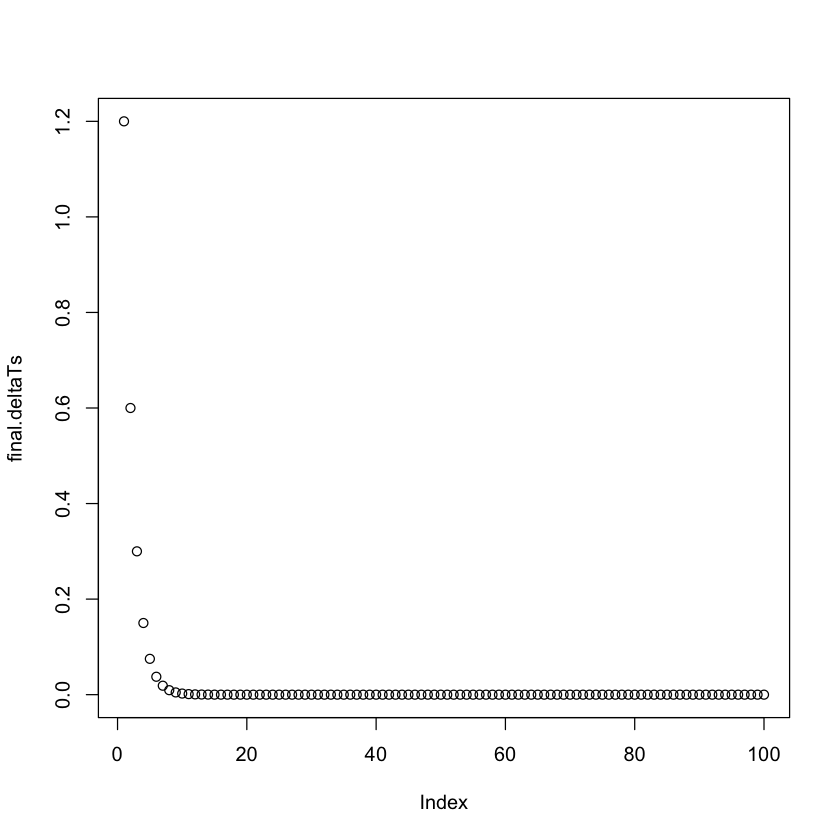

In [3]:
plot(final.deltaTs)

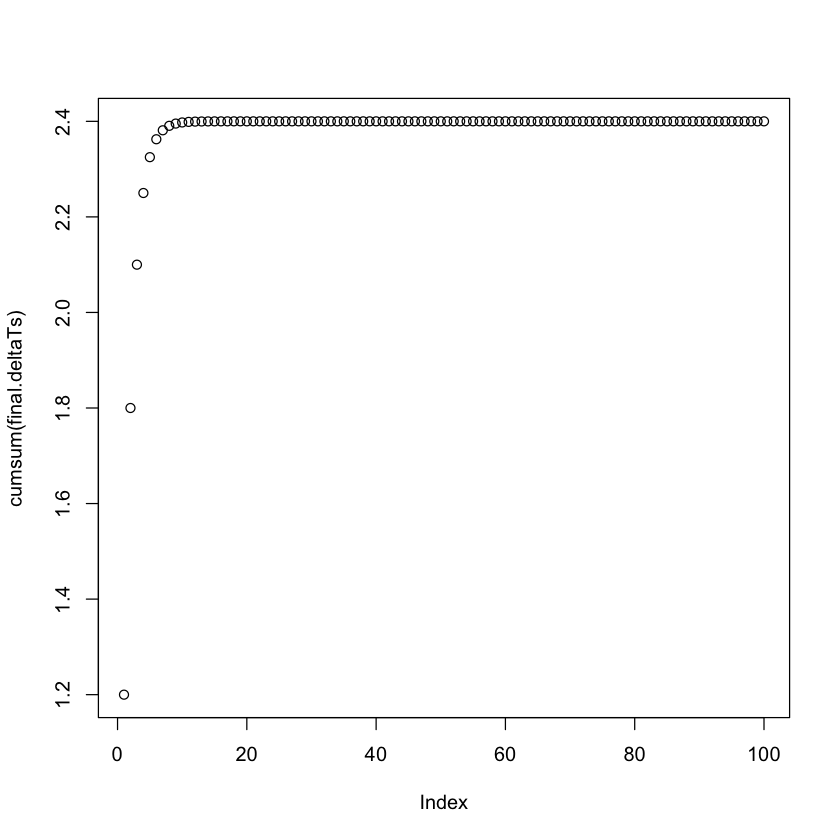

In [4]:
plot(cumsum(final.deltaTs))

In [5]:
1.2 / (1 - .5)

[1] 2.4

# Constructing some simple data

In [3]:
tt = seq(0, 10, by=.1)

In [3]:
tt

[1]  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0  1.1  1.2  1.3  1.4
 [16]  1.5  1.6  1.7  1.8  1.9  2.0  2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
 [31]  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.0  4.1  4.2  4.3  4.4
 [46]  4.5  4.6  4.7  4.8  4.9  5.0  5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
 [61]  6.0  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.0  7.1  7.2  7.3  7.4
 [76]  7.5  7.6  7.7  7.8  7.9  8.0  8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9
 [91]  9.0  9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.0

In [4]:
yy = 3.2 * cos(2.3 * (tt - 1)) + 1.1

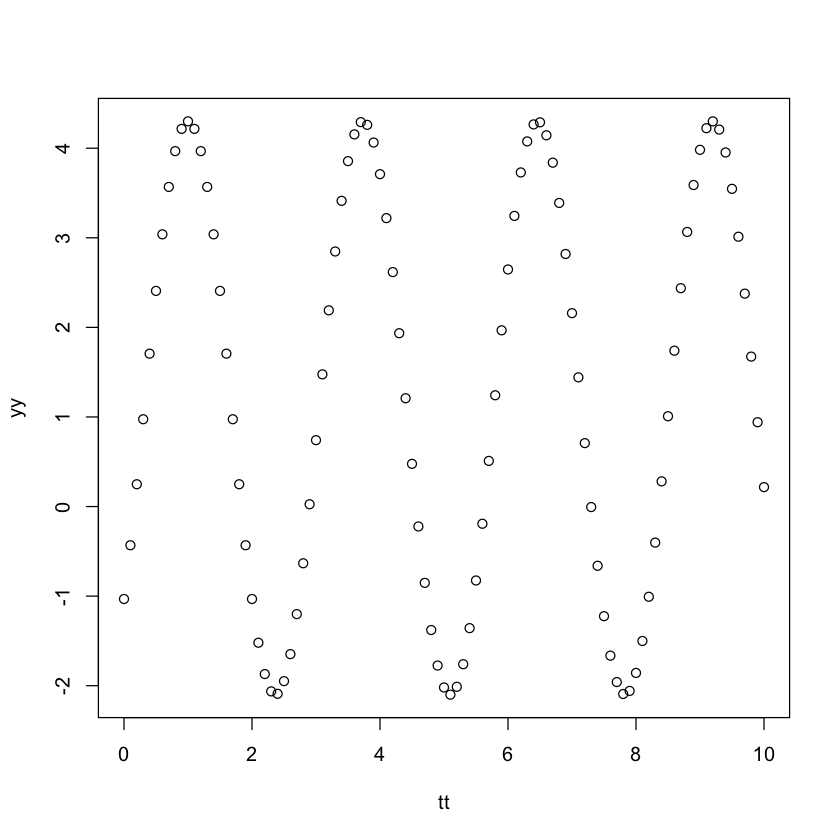

In [11]:
plot(tt, yy)

## Connecting parameter fit with optimization

We can see that our data is a sinusoid, so it has the form $A cos(f (t - d)) + B$. But what are the values of $A$, $f$, $d$ and $B$? To find the answer we need three things:

1. Our model: $A cos(f (t - d)) + B$
2. Our data: `yy` vs. `tt` above.
3. A "loss function": something that gets minimized when the parameters are correct.

R has a couple of easy-to-use functions that can fit be used to fit parameters in an arbitrary model: `optimize` and `optim`. `optimize` just optimizes 1 parameter, while `optim` handles any number.

## Case 1: A single value

Let's just try to determine the mean of the data. What should the loss function look like?

In [14]:
lossfunc = function(BB) {
    sum((yy - BB)^2)
}

In [18]:
optimize(lossfunc, c(0, 2))

$minimum
[1] 1.31916

$objective
[1] 493.1462

In [19]:
mean(yy)

[1] 1.31916

## Case 2: all four variables

In [33]:
model = function(AA, ff, dd, BB) {
    AA * cos(ff * (tt - dd)) + BB
}

In [34]:
lossfunc = function(par) {
    sum((yy - model(par[1], par[2], par[3], par[4]))^2)
}

In [35]:
optim(c(1, 1, 0, 0), lossfunc)

$par
[1] -0.6648991  1.3459424 -1.8449710  1.2720188

$value
[1] 469.7426

$counts
function gradient 
     335       NA 

$convergence
[1] 0

$message
NULL

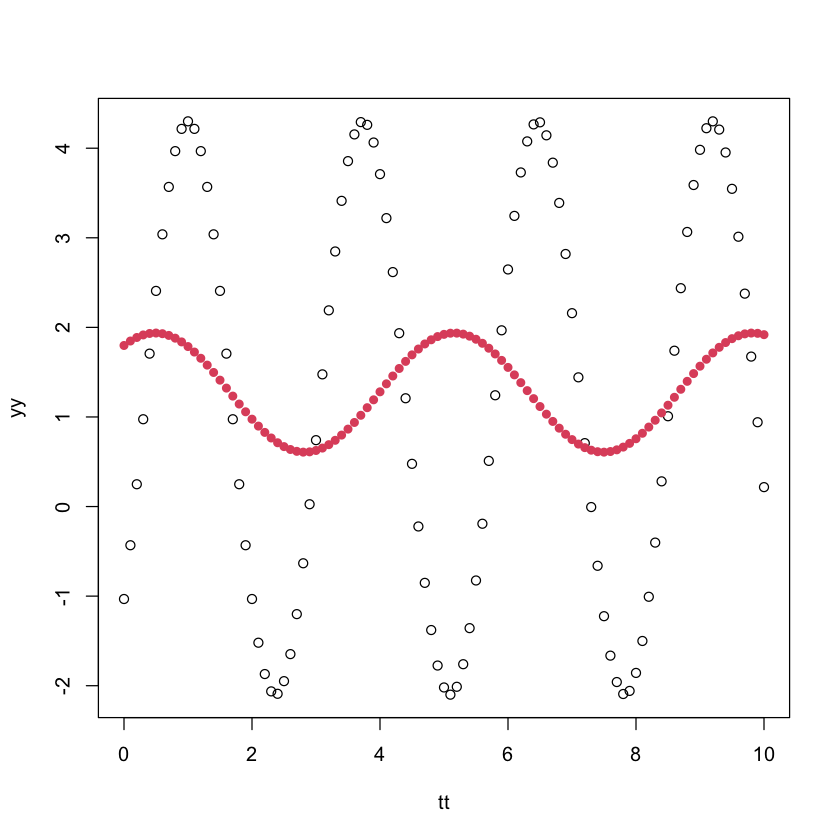

In [42]:
par = optim(c(1, 1, 0, 0), lossfunc)$par

plot(tt, yy, col=1)
points(tt, model(par[1], par[2], par[3], par[4]), col=2, pch=16)

Let's help it out!

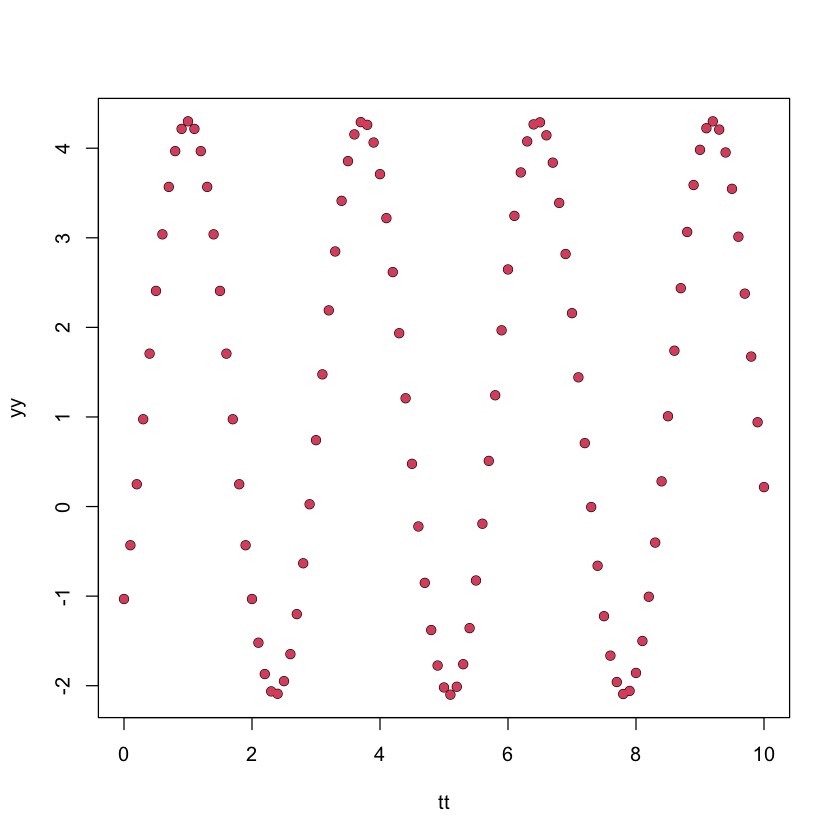

In [43]:
par = optim(c(3.2, 2.3, 1, 1.1), lossfunc)$par

plot(tt, yy, col=1)
points(tt, model(par[1], par[2], par[3], par[4]), col=2, pch=16)

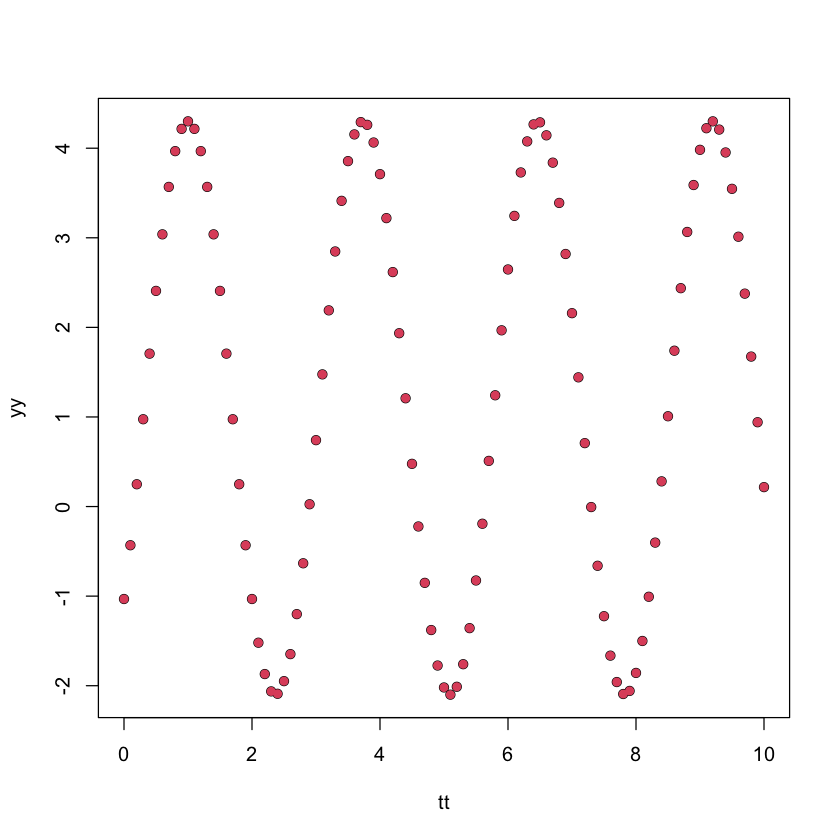

In [44]:
par = optim(c(3, 2, .9, 1), lossfunc)$par

plot(tt, yy, col=1)
points(tt, model(par[1], par[2], par[3], par[4]), col=2, pch=16)

**How far away can we go and still get the answer?**

## Why does this happen?

First, let's see if we can reproduce the problem with just 2 variables.

In [47]:
lossfunc = function(par) {
    sum((yy - model(par[1], par[2], 1, 1.1))^2)
}

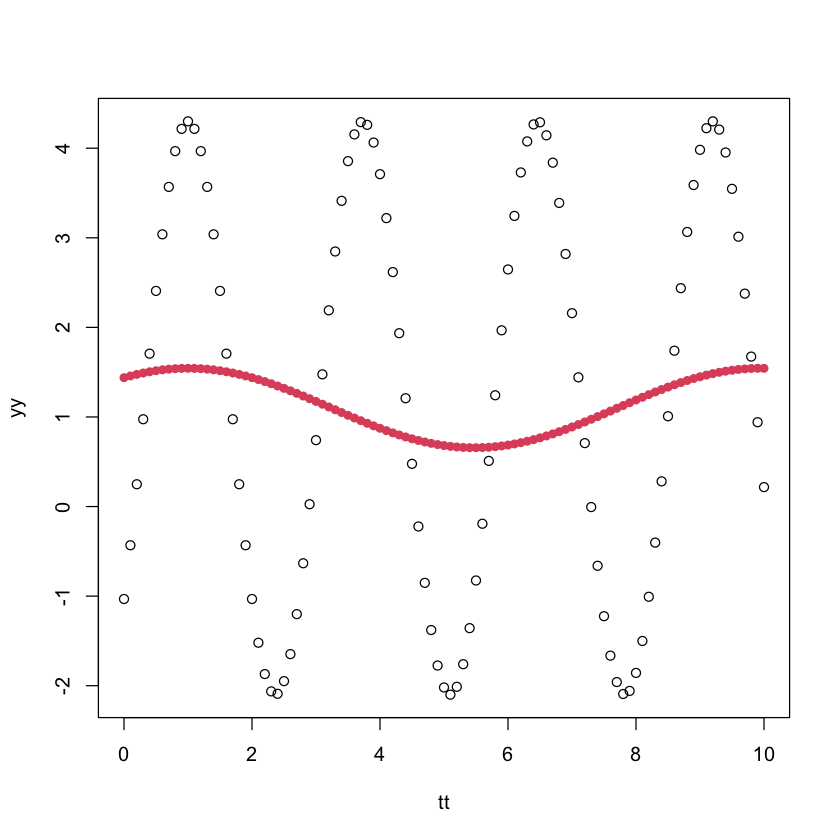

In [48]:
par = optim(c(1, 1, 0, 0), lossfunc)$par

plot(tt, yy, col=1)
points(tt, model(par[1], par[2], 1, 1.1), col=2, pch=16)

In [50]:
par

[1] 0.4433500 0.7022391 0.3516443 0.3009227

Assuming that also failed, let's sample an entire grid around our points.

In [65]:
grid = expand.grid(AA=seq(0, 6, length.out=100), ff=seq(0, 3, length.out=100))

In [66]:
grid$loss = sapply(1:nrow(grid), function(ii) lossfunc(c(grid$AA[ii], grid$ff[ii])))

In [9]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



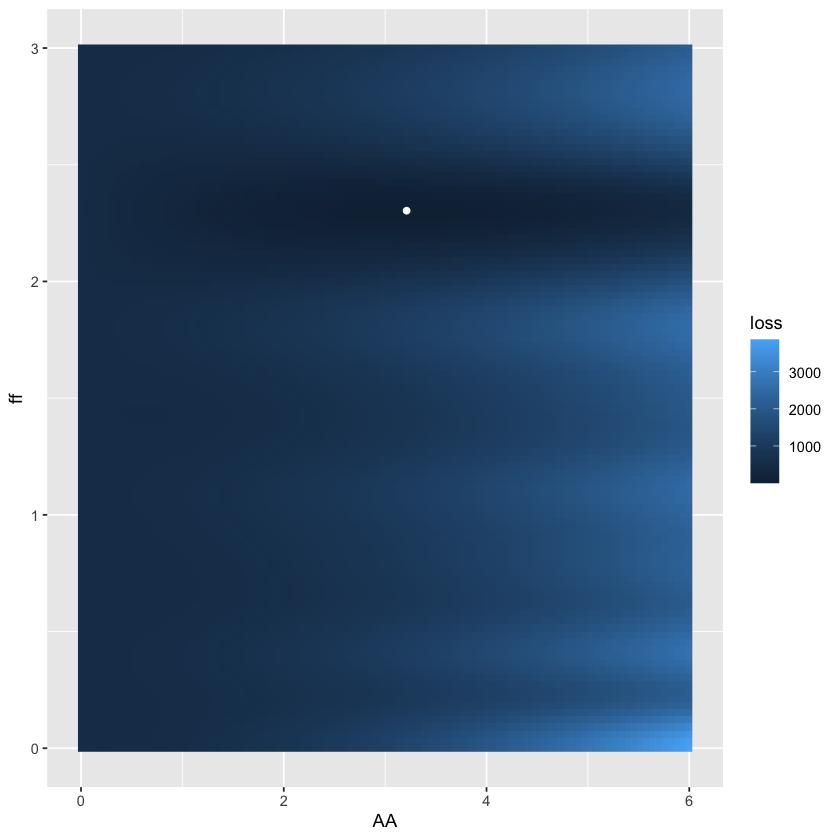

In [71]:
ggplot(grid, aes(AA, ff, fill=loss)) + geom_raster() + geom_point(data=grid[which.min(grid$loss),], col='white')

## Solution 1: Sample the whole space

## Solutions not appearing in this practicum

* Random sampling
* Genetic algorithms
* Simulated annealing

## Solution 2: Linearize with feedback

Sinusoids are the result of feedback. That means that we should be able to write something like:
$$y_t = \alpha + \beta y_{t-1}$$

Let's try it!

In [5]:
model = function(aa, bb, y1) {
    yys = y1
    yprev = y1
    for (ii in 2:length(tt)) {
        yprev = aa + bb * yprev
        yys[ii] = yprev
    }
    yys
}

NOTE: We need to use `tidyverse` here: it defines a more sensible `lag` function.

In [12]:
summary(lm(yy ~ lag(yy, 1)))


Call:
lm(formula = yy ~ lag(yy, 1))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74979 -0.52044  0.00858  0.52045  0.70969 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.05603    0.06157    0.91    0.365    
lag(yy, 1)   0.96726    0.02381   40.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.528 on 98 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.944,	Adjusted R-squared:  0.9434 
F-statistic:  1651 on 1 and 98 DF,  p-value: < 2.2e-16


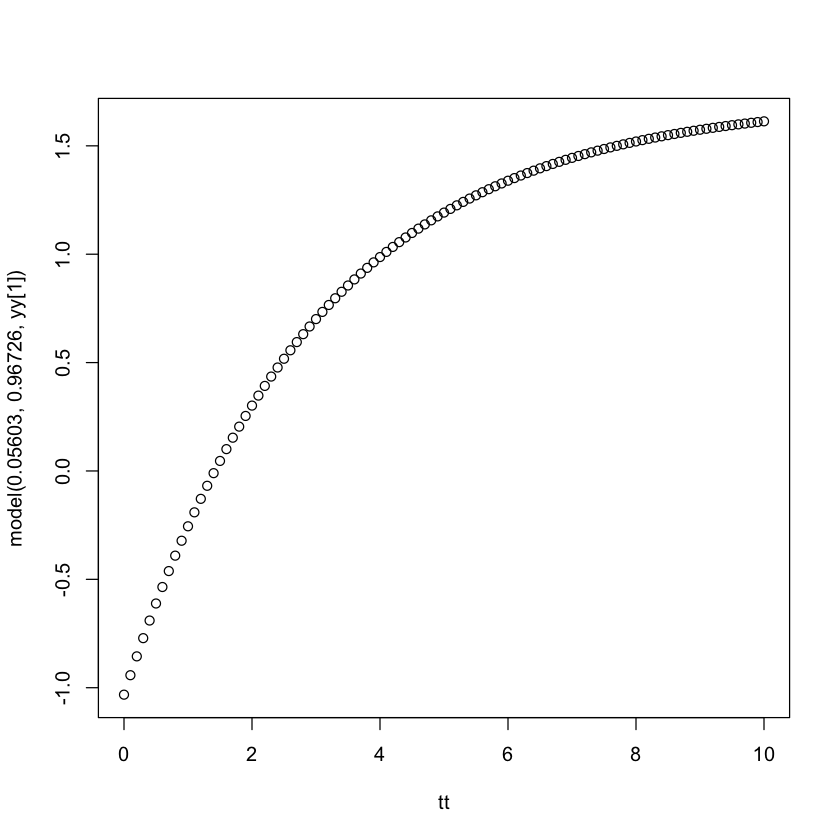

In [13]:
plot(tt, model(0.05603, 0.96726, yy[1]))

Let's try $$y_t = \alpha + \beta y_{t-1} + \gamma y_{t-2}$$

In [16]:
model = function(aa, bb, cc, y1, y2) {
    yys = c(y1, y2)
    for (ii in 3:length(tt)) {
        yys[ii] = aa + bb * yys[ii-1] + cc * yys[ii-2]
    }
    yys
}

In [17]:
summary(lm(yy ~ lag(yy) + lag(yy, 2)))


Call:
lm(formula = yy ~ lag(yy) + lag(yy, 2))

Residuals:
       Min         1Q     Median         3Q        Max 
-1.606e-14 -1.716e-15  3.060e-17  1.792e-15  2.204e-14 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  5.793e-02  6.412e-16  9.035e+13   <2e-16 ***
lag(yy)      1.947e+00  1.052e-15  1.850e+15   <2e-16 ***
lag(yy, 2)  -1.000e+00  1.046e-15 -9.555e+14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.444e-15 on 96 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 8.173e+30 on 2 and 96 DF,  p-value: < 2.2e-16


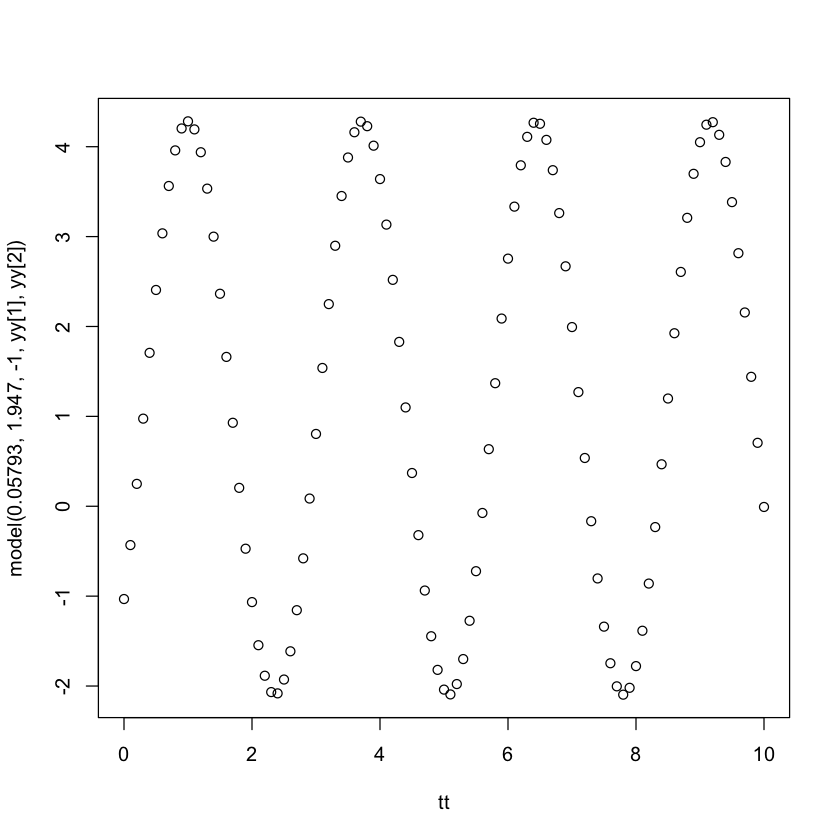

In [18]:
plot(tt, model(5.793e-02, 1.947, -1, yy[1], yy[2]))

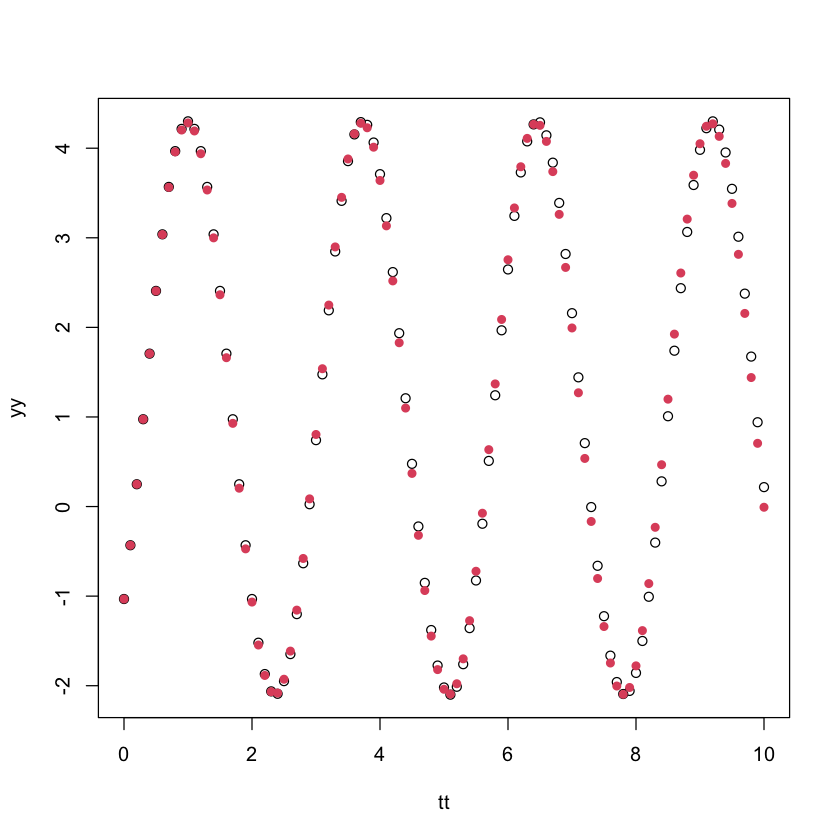

In [20]:
plot(tt, yy, col=1)
points(tt, model(5.793e-02, 1.947, -1, yy[1], yy[2]), col=2, pch=16)

**This is why you get oscillations when you try to set the thermostat!**

**Why doesn't the first feedback model above (Roe & Baker) make oscillations?**